In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import inspect
from datetime import datetime
import seaborn as sns
import glob
from os.path import basename
sns.set_context('poster')
import re
import csv

## Step 1 : Smooth
## Step 2: Peaks

In [2]:
df_full = pandas.read_excel('../data/GTD_0616dist/gtd_12to15_0616dist.xlsx')

In [3]:
df_2015 = df_full[df_full.iyear == 2015] 

In [6]:
print len(df_2015)
df_2015['datetime'] = pandas.to_datetime((df_2015.iyear*10000+df_2015.imonth*100+df_2015.iday).apply(str),format='%Y%m%d')
print len(df_2015)

14806
14806


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [62]:
incidents_usa = df_2015[df_2015.country_txt == 'United States']
incidents_usa.index = incidents_usa['datetime'] #reindex
del incidents_usa['datetime']

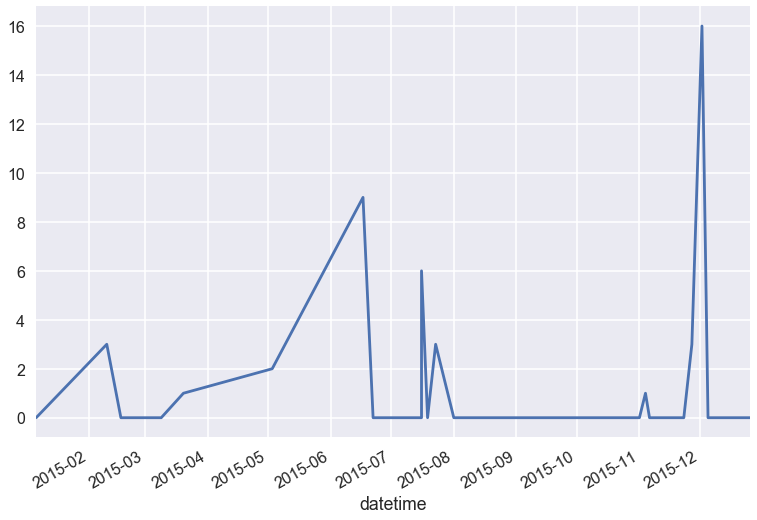

In [68]:
incidents_usa.nkill.plot()

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


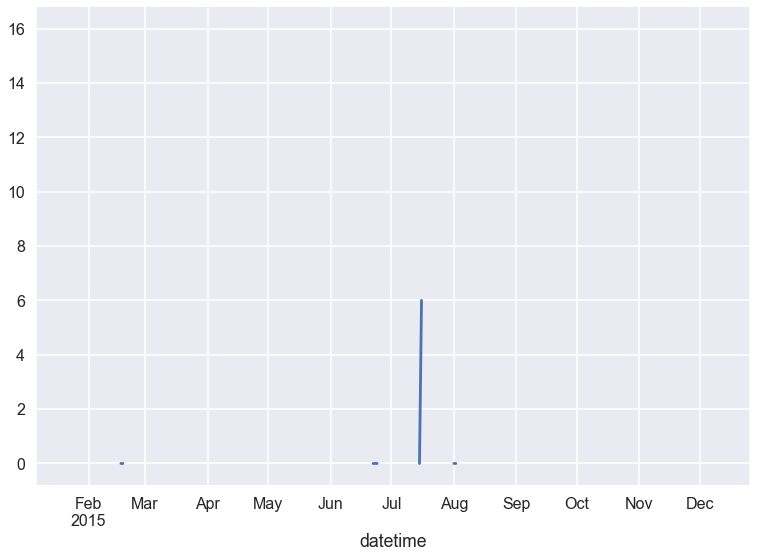

In [76]:
incidents_usa.resample('D', how='sum').nkill.plot()

In [73]:
incidents_iraq = df_2015[df_2015.country_txt == 'Iraq']
incidents_iraq.index = incidents_iraq['datetime'] #reindex
del incidents_iraq['datetime']

In [105]:
incidents_france = df_2015[df_2015.country_txt == 'France']
incidents_france.index = incidents_france['datetime'] #reindex
del incidents_france['datetime']

## Run thru a few other countries

In [92]:
countries = ['Afghanistan', 'China', 'Yemen', 'France', 'United Kingdom']
dfs = []
for c in countries:
    df = df_2015[df_2015.country_txt == 'Iraq']
    df.index = df['datetime'] #reindex
    del df['datetime']
    dfs.append(df)

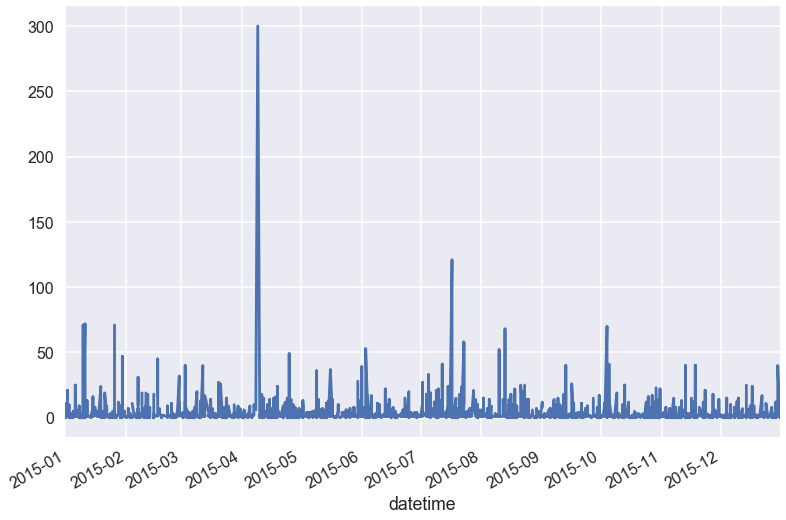

In [74]:
incidents_iraq.nkill.plot()

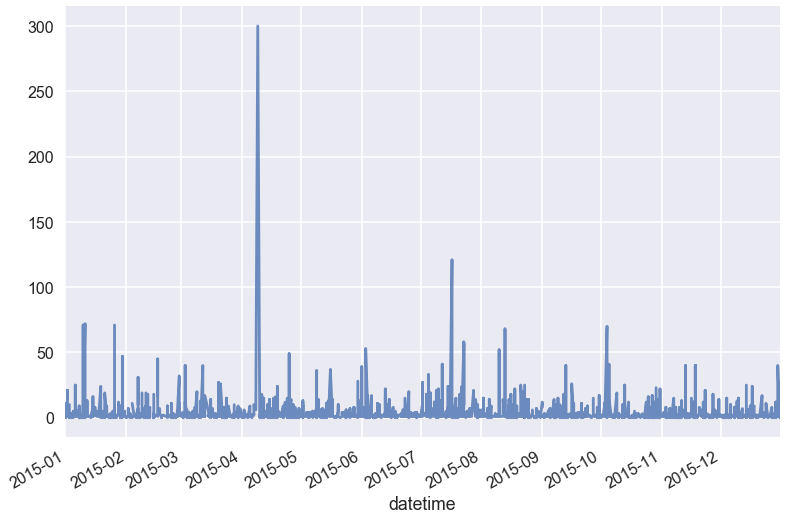

In [104]:

dfs[3].nkill.plot( alpha=0.8, label=countries[3])

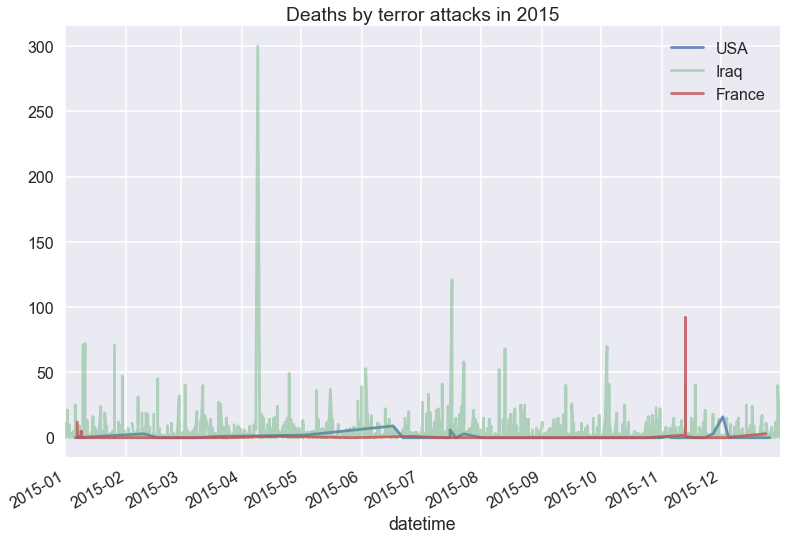

In [109]:
ax = incidents_usa.nkill.plot(alpha=0.8, label='USA')
incidents_iraq.nkill.plot(ax=ax, alpha=0.4, label='Iraq') 
incidents_france.nkill.plot(ax=ax, alpha=0.8, label='France') 

# for i in xrange(len(dfs)-4):
#     dfs[i].nkill.plot(ax=ax, alpha=0.5, label=countries[i])
    
plt.legend()
plt.title('Deaths by terror attacks in 2015')

## Do this by sum of deaths actually. Have to do by country whole set too damn noisy

In [9]:
incidents = df_2015.datetime.value_counts()

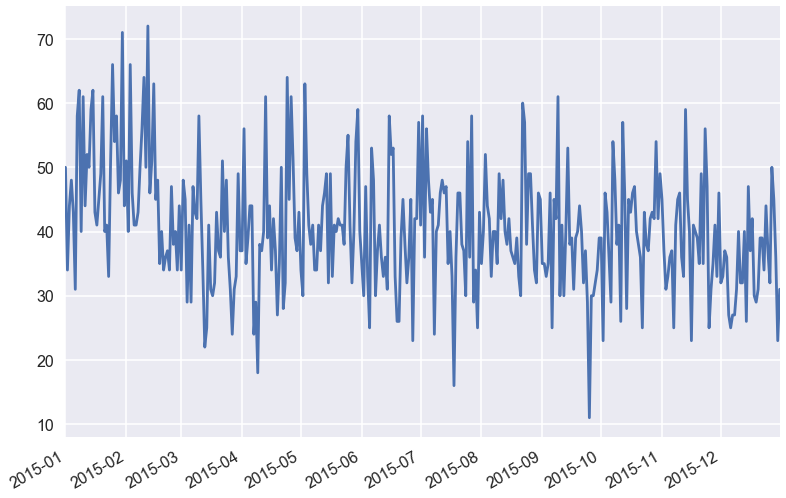

In [12]:
incidents.plot()

In [84]:
top_10 = df_2015.country.value_counts()[:10].index

In [87]:
for 
df_2015.targtype1.value_counts(normalize=True)

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [90]:
gb = df_full.groupby(['iyear', 'country_txt', 'targtype1_txt'], as_index=False).size()
gb.name = 'size'
gb = gb.reset_index()
gb.sort_values(['iyear', 'country_txt', 'size'], ascending=False) 

,iyear,country_txt,targtype1_txt,size
2276,2015,Yemen,Private Citizens & Property,187
2272,2015,Yemen,Military,135
2282,2015,Yemen,Violent Political Party,87
2269,2015,Yemen,Government (General),64
2278,2015,Yemen,Terrorists/Non-State Militia,41
2277,2015,Yemen,Religious Figures/Institutions,29
2270,2015,Yemen,Journalists & Media,25
2266,2015,Yemen,Business,21
2275,2015,Yemen,Police,17
2280,2015,Yemen,Unknown,16


In [104]:
by_year = gb.pivot_table('size', ['country_txt', 'targtype1_txt'], 'iyear') 
by_year['total'] = by_year.apply(lambda row: row[2012] + row[2013] + row[2014] + row[2015], axis=1)
 

iyear                                                     2012   2013   2014  \
country_txt              targtype1_txt                                         
Afghanistan              Airports & Aircraft               8.0    4.0    5.0   
                         Business                         36.0   30.0   30.0   
                         Educational Institution          24.0   26.0   25.0   
                         Food or Water Supply              3.0    NaN    1.0   
                         Government (Diplomatic)          10.0    7.0    8.0   
                         Government (General)            138.0  158.0  237.0   
                         Journalists & Media               5.0    6.0   10.0   
                         Military                        501.0  350.0  299.0   
                         NGO                               8.0   14.0   15.0   
                         Other                             2.0    NaN    5.0   
                         Police                          387.0  505.0  609.0   
                         Private Citizens & Property     251.0  226.0  354.0   
                         Religious Figures/Institutions    7.0   13.0   22.0   
                         Telecommunication                 3.0   12.0    6.0   
                         Terrorists/Non-State Militia      3.0    3.0    9.0   
                         Transportation                   10.0   13.0   11.0   
                         Unknown                          70.0   67.0  171.0   
                         Utilities                         NaN    5.0    3.0   
                         Violent Political Party           3.0    2.0    NaN   
Albania                  Business                          NaN    NaN    NaN   
                         Government (General)              NaN    1.0    1.0   
                         Police                            NaN    NaN    NaN   
                         Private Citizens & Property       NaN    NaN    1.0   
                         Transportation                    NaN    NaN    NaN   
                         Unknown                           NaN    NaN    NaN   
Algeria                  Business                          1.0    2.0    NaN   
                         Educational Institution           1.0    NaN    NaN   
                         Government (General)              1.0    3.0    2.0   
                         Journalists & Media               NaN    1.0    NaN   
                         Military                         16.0    8.0    6.0   
...                                                        ...    ...    ...   
West Bank and Gaza Strip Religious Figures/Institutions    2.0    4.0    5.0   
                         Terrorists/Non-State Militia      1.0    NaN    NaN   
                         Tourists                          NaN    NaN    NaN   
                         Transportation                    NaN    4.0    4.0   
                         Unknown                           3.0   11.0    9.0   
                         Violent Political Party           NaN    4.0    9.0   
Yemen                    Airports & Aircraft               2.0    NaN    4.0   
                         Business                          4.0   16.0   27.0   
                         Educational Institution           1.0    8.0   14.0   
                         Government (Diplomatic)           8.0   10.0    9.0   
                         Government (General)             69.0   57.0   99.0   
                         Journalists & Media               1.0    5.0   24.0   
                         Maritime                          NaN    1.0    NaN   
                         Military                        113.0  136.0  265.0   
                         NGO                               1.0    5.0    5.0   
                         Other                             NaN    NaN    1.0   
                         Police                           31.0   48.0   57.0   


In [ ]:
gb['total_size'] = gb.groupby('first_column')['size'].transform('sum')

In [81]:
df_full.groupby(['iyear', 'country_txt', 'targtype1_txt'], as_index=False).size()

iyear  country_txt               targtype1_txt                 
2012   Afghanistan               Airports & Aircraft                 8
                                 Business                           36
                                 Educational Institution            24
                                 Food or Water Supply                3
                                 Government (Diplomatic)            10
                                 Government (General)              138
                                 Journalists & Media                 5
                                 Military                          501
                                 NGO                                 8
                                 Other                               2
                                 Police                            387
                                 Private Citizens & Property       251
                                 Religious Figures/Institutions      7
             